# Intuition
- pyLDAvis 缺少doc_length 和term_frequency的组件
- data['doc_lengths'] = doc_lengths   就是每篇文章的长度
- data['term_frequency'] = term_frequency   至于词频应该在counts那个地方就有保存成np的格式就可以

## doc_length

# 模型的效果测试-pyLDAvis阶段

In [17]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

try:
    import seaborn
except:
    pass

In [18]:
import pyLDAvis
pyLDAvis.enable_notebook()

In [19]:
npz = np.load('topics.pyldavis.npz')
dat = {k: v for (k, v) in npz.items()}
dat['vocab'] = dat['vocab'].tolist()

In [4]:
top_n = 10
topic_to_topwords = {}
for j, topic_to_word in enumerate(dat['topic_term_dists']):
    top = np.argsort(topic_to_word)[::-1][:top_n]
    msg = 'Topic %i '  % j
    top_words = [dat['vocab'][i].strip()[:35] for i in top]
    msg += ' '.join(top_words)
    print(msg)
    topic_to_topwords[j] = top_words

Topic 0 韩朝 平昌 代表团 高级别 统一 赵明 参赛 参加 韩方 部
Topic 1 导弹 战争 打击 核武器 发射 核试验 弹道导弹 警告 试验 攻击
Topic 2 阿富汗 警报 夏威夷 巴基斯坦 乌克兰 记住 伊朗 印巴 伊斯兰 署
Topic 3 昂贵 贸易战 索罗斯 贸易 交付 案例 投票 预言 受访 亿美元
Topic 4 萨德 部署 系统 反导 朴槿惠 施工 雷达 波段 星州 侵害
Topic 5 各方 王毅 答 安理会 拉夫罗夫 陆慷 妥善解决 推动 决议 维护
Topic 6 复兴 文明 领导 秒 有多强 外号 上当 吃亏 崛起 生命
Topic 7 美元 指数 黄金 上涨 一线 价格 油价 上方 市场 通胀
Topic 8 朝美 平昌 互动 冬奥 太空 南北 领导人 改善 首脑 之窗
Topic 9 协议 社会党 慰安妇 完善 教育体制 韩日 工作者 达成 对立 参选
Topic 10 维德 大使 驻 车 提名 接受 韩裔 官员 前 协议
Topic 11 投机 房地产 产业 市场 泡沫 行业 永远 董事长 利好 人民币
Topic 12 蒂勒 杓 洪准 森 宋永武 弗里 兰 马蒂斯 康京 访日
Topic 13 有多强 外号 上当 吃亏 秒 吴承恩 痛快 脑袋 西游记 影射
Topic 14 音频 装 文字 智商 自慰 三五个 视频 情有可原 快乐 不疑
Topic 15 北约 慕安会 慕尼黑 伊核 特雷斯 古 傅莹 协议 容克 伊朗
Topic 16 慰安妇 安倍 修宪 自民党 日本政府 日方 韩日 受害者 安倍晋三 朱建荣
Topic 17 马克 法国 龙 法 中法 改革 欧盟 主义 中法关系 转型
Topic 18 选举 共和党 议员 候选人 民主党 普京 权力 支持率 总统大选 民主
Topic 19 崔天凯 一国两制 滥用 崔 不公 同归于尽 港人 慎重处理 结婚 灾难
Topic 20 走 奋斗 遗憾 想 方式 做 一点 吃 无须 只
Topic 21 李度 勋 孔铉 团长 佑 部长 交涉 代表 外交部 事务
Topic 22 郑义 溶 会面 美朝 白宫 尹汝尚 蓬佩奥 桑德斯 特使团 溶说
Topic 23 亚太地区 印太 司令部 作战 指挥权 亚太 印度洋 军队 太平洋 国防
Topic 24 南海 菲律宾 台湾 航行 

In [5]:
import warnings
warnings.filterwarnings('ignore')
prepared_data = pyLDAvis.prepare(dat['topic_term_dists'], dat['doc_topic_dists'], 
                                 dat['doc_lengths'] * 1.0, dat['vocab'], dat['term_frequency'] * 1.0, mds='tsne')

In [14]:
pyLDAvis.display(prepared_data)

In [20]:
labels = [   '朝鲜半岛高级别会谈',
    '核武威慑',
    '中东战乱',
    '贸易战',
    '韩国萨德反导',
    '中国外交部答记者问',
    '中华复兴',
    '国际金融市场',
    '朝鲜半岛关系缓和',
    '东亚政治',
    '东亚三国交流',
    '中国大陆经济投资风向',
    '东亚各国外交',
    '奇怪的西游记文本',
    '奇怪的噪声效果文本',
    '伊朗问题',
    '日本当局对二战的不负责态度',
    '中法关系',
    '美国大选',
    '港澳台局势',
    '奇怪的效果(忽略1)',
    '奇怪的效果(忽略2)',
    '奇怪的效果(忽略3))',
    '美国泛太平洋战略',
    '南海问题',

]
labels = np.array(labels)

In [58]:
import pandas as pd
features = pd.read_csv('cn_sina.csv', encoding='utf8')
# 删除含有NaN值的任何Row，防止数据处理时的bug
features = features.dropna()
# news_data = news_data.dropna()
# 对pd表重新排序
features.reset_index(drop=True, inplace=True)

In [59]:
features

,id,iid,urls,title,website,times,timestamp1,abstract,fulltext1
0,1,591,http://news.sina.com.cn/c/2016-12-03/doc-ifxyi...,韩日又拱火对朝追加制裁 中方呼吁慎重行事,环球时报,2016-12-03 09:12:39,1480727559,韩日两国分别推出新的对朝单边制裁措施。联合国安理会刚通过新的对朝制裁决议，韩日就迫不及待地追...,现在美国大选的结果开始出现了疑问，有三个州的选票可能被某国家黑客捣乱而需要重新计票。沙僧就这...
1,2,999,http://news.sina.com.cn/o/2017-08-30/doc-ifykp...,日媒称美国将朝鲜问题“抛给中国”缺乏判断力,参考消息,2017-08-30 11:44:52,1504064692,日报道 日本《外交》双月刊7/8月号发表日本青山学院大学副教授林载桓的文章称，认为中国在朝核...,跟格局小的人打交道，就像被缩骨伞夹住脑袋一样不痛快。号外号外，特朗普又出行政命令啦！行政命令...
2,3,18,http://news.sina.com.cn/o/2016-03-04/doc-ifxqa...,望涉朝决议全面执行,深圳商报,2016-03-04 04:15:06,1457036106,维护国际核不扩散体系。这个决议重申了各方通过对话协商解决朝核问题、支持恢复六方会谈的承诺，符...,实业兴国，炒房误国。干30年不如买套房，则对这个常规理念的异化，把它颠倒成“实业误国，炒房兴...
3,4,1280,http://news.sina.com.cn/o/2017-08-16/doc-ifyix...,王毅同俄外长谈朝鲜局势：不允许在中俄家门口挑事,封面新闻,2017-08-15 21:38:44,1502804324,朝鲜半岛局势可能再次激化。通过军事武力手段解决朝核问题完全不可接受，必须坚持通过政治外交手段...,跟格局小的人打交道，就像被缩骨伞夹住脑袋一样不痛快。号外号外，特朗普又出行政命令啦！行政命令...
4,5,1236,http://finance.sina.com.cn/money/bank/bank_hyd...,外交部：将大幅度放宽银行证券保险行业市场准入,外交部网站,2017-11-09 16:33:46,1510216426,据中国外交部副部长郑泽光向媒体介绍，习近平主席和特朗普总统就中美关系和共同关心的重大国际与地...,“漂亮50”的诸多个股已经运行到了溢价的位置。美国中长期经济仍将陷入缓慢增长模式。比尔盖茨加...
5,6,815,http://news.sina.com.cn/o/2017-04-08/doc-ifyec...,王毅介绍中美元首海湖庄园会晤情况,外交部网站,2017-04-08 15:37:27,1491637047,中方将继续全面执行联合国安理会涉朝决议。中方介绍了解决朝核问题的“双轨并行”思路和“双暂停”...,跟格局小的人打交道，就像被缩骨伞夹住脑袋一样不痛快。号外号外，特朗普又出行政命令啦！行政命令...
6,8,757,http://news.sina.com.cn/o/2017-04-14/doc-ifyei...,叙利亚议案中国弃权引发中俄关系猜测？中国外交部这样说,环球网,2017-04-14 08:31:26,1492129886,问：第一，昨天美国总统特朗普在记者会上表示，中国已经开始着手采取一些具体措施应对朝核问题，近...,跟格局小的人打交道，就像被缩骨伞夹住脑袋一样不痛快。号外号外，特朗普又出行政命令啦！行政命令...
7,9,1275,http://mil.news.sina.com.cn/2017-08-17/doc-ify...,范长龙：美国在萨德台湾及南海问题上行动错误,国防部网站,2017-08-17 13:24:43,1502947483,避免加剧朝鲜半岛局势紧张的言行。我们希望美方与中方一道，推动有关各方相向而行，共同为解决朝核...,据国防部网站8月17日消息，8月17日，中央军委副主席范长龙在北京八一大楼会见了美军参联会主...
8,12,1218,http://news.sina.com.cn/o/2017-08-21/doc-ifykc...,“中国观”，与世界共同前行,新华日报,2017-08-21 06:09:38,1503266978,破解“安全困境”，展现大国担当。在朝核问题上，中方提出“双暂停”倡议和“双轨并行”思路；在中...,跟格局小的人打交道，就像被缩骨伞夹住脑袋一样不痛快。号外号外，特朗普又出行政命令啦！行政命令...
9,13,1559,http://news.sina.com.cn/w/2018-05-25/doc-ihcaq...,金灿荣：特朗普和金正恩其实都想谈 但有人不答应,观察者网,2018-05-25 19:16:45,1527247005,彭斯是建制派派到特朗普身边监督他的，包括后来美国国家安全顾问博尔顿又出来搅局，用利比亚模式吓...,原标题：金灿荣：特朗普和金正恩其实都想谈，但有人不答应金灿荣/中国人民大学国际关系学院教授观...


In [60]:
list_select = [1,3,5,7,34,22]

In [61]:
len(features)

4816

In [67]:
new_fea = features.iloc[list_select] 

In [68]:
new_fea

,id,iid,urls,title,website,times,timestamp1,abstract,fulltext1
1,2,999,http://news.sina.com.cn/o/2017-08-30/doc-ifykp...,日媒称美国将朝鲜问题“抛给中国”缺乏判断力,参考消息,2017-08-30 11:44:52,1504064692,日报道 日本《外交》双月刊7/8月号发表日本青山学院大学副教授林载桓的文章称，认为中国在朝核...,跟格局小的人打交道，就像被缩骨伞夹住脑袋一样不痛快。号外号外，特朗普又出行政命令啦！行政命令...
3,4,1280,http://news.sina.com.cn/o/2017-08-16/doc-ifyix...,王毅同俄外长谈朝鲜局势：不允许在中俄家门口挑事,封面新闻,2017-08-15 21:38:44,1502804324,朝鲜半岛局势可能再次激化。通过军事武力手段解决朝核问题完全不可接受，必须坚持通过政治外交手段...,跟格局小的人打交道，就像被缩骨伞夹住脑袋一样不痛快。号外号外，特朗普又出行政命令啦！行政命令...
5,6,815,http://news.sina.com.cn/o/2017-04-08/doc-ifyec...,王毅介绍中美元首海湖庄园会晤情况,外交部网站,2017-04-08 15:37:27,1491637047,中方将继续全面执行联合国安理会涉朝决议。中方介绍了解决朝核问题的“双轨并行”思路和“双暂停”...,跟格局小的人打交道，就像被缩骨伞夹住脑袋一样不痛快。号外号外，特朗普又出行政命令啦！行政命令...
7,9,1275,http://mil.news.sina.com.cn/2017-08-17/doc-ify...,范长龙：美国在萨德台湾及南海问题上行动错误,国防部网站,2017-08-17 13:24:43,1502947483,避免加剧朝鲜半岛局势紧张的言行。我们希望美方与中方一道，推动有关各方相向而行，共同为解决朝核...,据国防部网站8月17日消息，8月17日，中央军委副主席范长龙在北京八一大楼会见了美军参联会主...
34,41,1382,http://news.sina.com.cn/w/2018-01-02/doc-ifyqc...,朝鲜有意参加平昌冬奥会 韩国总统责成政府部门尽快拿方案,央视,2018-01-02 14:26:07,1514874367,保证朝鲜代表团顺利参加平昌冬奥会。文在寅还表示，改善韩朝关系不能与解决朝核问题脱钩，并指示外...,韩国总统文在寅今天（2日）在青瓦台主持召开国务会议，他对朝鲜最高领导人金正恩在1日发表的新年...
22,28,1554,http://news.sina.com.cn/o/2018-03-15/doc-ifysh...,美朝首脑会谈消息后：朝鲜缄默 特朗普随性引担忧,澎湃新闻,2018-03-15 07:43:16,1521070996,”南京大学国际关系学院院长朱锋日前在接受澎湃新闻（www.thepaper.cn）采访时对 ...,原标题：美朝首脑会谈消息传出之后：朝鲜保持缄默，特朗普随性引担忧“这一波朝鲜局势变化的大幕才...


In [7]:
HN = pd.read_csv('hacker_news_comments.csv')

In [9]:
features = HN

In [10]:
# Convert all integer arrays to int32
for col, dtype in zip(features.columns, features.dtypes):
    if dtype is np.dtype('int64'):
        features[col] = features[col].astype('int32')

In [11]:

max_length = 250   # Limit of 250 words per comment
min_author_comments = 50  # Exclude authors with fewer comments
nrows = None  # Number of rows of file to read; None reads in full file

In [25]:
features = HN

In [26]:

# Convert all integer arrays to int32
for col, dtype in zip(features.columns, features.dtypes):
    if dtype is np.dtype('int64'):
        features[col] = features[col].astype('int32')

In [27]:
max_length = 250   # Limit of 250 words per comment
min_author_comments = 50  # Exclude authors with fewer comments
nrows = None  # Number of rows of file to read; None reads in full file

In [12]:
# Extract numpy arrays over the fields we want covered by topics
# Convert to categorical variables
author_counts = features['comment_author'].value_counts()
to_remove = author_counts[author_counts < min_author_comments].index
mask = features['comment_author'].isin(to_remove).values
author_name = features['comment_author'].values.copy()
author_name[mask] = 'infrequent_author'
features['comment_author'] = author_name
authors = pd.Categorical(features['comment_author'])
author_id = authors.codes
author_name = authors.categories
story_id = pd.Categorical(features['story_id']).codes
# Chop timestamps into days
story_time = pd.to_datetime(features['story_time'], unit='s')
days_since = (story_time - story_time.min()) / pd.Timedelta('1 day')
time_id = days_since.astype('int32')
days_since = (story_time - story_time.min()) / pd.Timedelta('1 day')
features['story_id_codes'] = story_id 
features['author_id_codes'] = story_id
features['time_id_codes'] = time_id
features['days_since'] = days_since
features['story_dt'] = story_time

In [13]:

features.tail()

,story_id,story_time,story_url,story_text,story_author,comment_id,comment_text,comment_author,comment_ranking,author_comment_count,story_comment_count,story_id_codes,author_id_codes,time_id_codes,days_since,story_dt
1165434,1013531,1261638606,NaN,"For the year 2010, I plan to:\n1. Learn Clojur...",aitoehigie,1013543,I plan to end 2010 with 10x as many customers ...,cperciva,2,1346,51,5787,5787,1037,1037.401030,2009-12-24 07:10:06
1165435,1013531,1261638606,NaN,"For the year 2010, I plan to:\n1. Learn Clojur...",aitoehigie,1013710,Being very close to graduate in the end of the...,infrequent_author,39,74,51,5787,5787,1037,1037.401030,2009-12-24 07:10:06
1165436,4312761,1343662100,http://code.google.com/p/chromium/issues/detai...,NaN,eranation,4313810,Not surprising. The amount of <i>aggressive</i...,infrequent_author,1,46,11,27058,27058,1986,1986.747025,2012-07-30 15:28:20
1165437,9804349,1435663051,http://blogs.aws.amazon.com/security/post/TxCK...,NaN,ukj,9804795,If I counted right:<p><pre><code> OCaml TLS: ...,edwintorok,0,93,17,62571,62571,3051,3051.572847,2015-06-30 11:17:31
1165438,6765099,1384901786,http://www.theatlantic.com/technology/archive/...,NaN,sinak,6767538,We are educated to speak well our language (en...,infrequent_author,10,91,41,43699,43699,2464,2464.058206,2013-11-19 22:56:26


In [14]:
cols = [u'story_comment_count', 'story_time', 'story_url', 'story_text', 'days_since', 'story_dt']
stories = features.groupby('story_id_codes')[cols].min().reset_index()

In [15]:
stories = stories.rename(columns={'story_dt': 'Article Date'})

## 问题
- 是原本的数据就有全部的story_id_codes

In [16]:
stories

,story_id_codes,story_comment_count,story_time,story_url,story_text,days_since,Article Date
0,0,18,1172007157,http://ycombinator.com/announcingnews.html,NaN,0.000000,2007-02-20 21:32:37
1,1,16,1172018845,http://octopart.com/html/blog.html,NaN,0.135278,2007-02-21 00:47:25
2,2,1216,1172085729,NaN,NaN,0.909398,2007-02-21 19:22:09
3,3,20,1172971421,NaN,NaN,11.160463,2007-03-04 01:23:41
4,4,30,1173064288,NaN,NaN,12.235312,2007-03-05 03:11:28
5,5,18,1173303503,NaN,NaN,15.004005,2007-03-07 21:38:23
6,6,14,1173340157,NaN,NaN,15.428241,2007-03-08 07:49:17
7,7,19,1173425317,NaN,NaN,16.413889,2007-03-09 07:28:37
8,8,11,1173556730,NaN,NaN,17.934873,2007-03-10 19:58:50
9,9,11,1173877667,http://www.e-texteditor.com/index.html,NaN,21.649421,2007-03-14 13:07:47


In [46]:
stories.groupby(trends['Article Date'].dt.date).mean()

,story_id_codes,story_comment_count,story_time,days_since
Article Date,,,,
2007-02-20,0.0,18.000000,1.172007e+09,0.000000
2007-02-21,1.5,616.000000,1.172052e+09,0.522338
2007-03-04,3.0,20.000000,1.172971e+09,11.160463
2007-03-05,4.0,30.000000,1.173064e+09,12.235312
2007-03-07,5.0,18.000000,1.173304e+09,15.004005
2007-03-08,6.0,14.000000,1.173340e+09,15.428241
2007-03-09,7.0,19.000000,1.173425e+09,16.413889
2007-03-10,8.0,11.000000,1.173557e+09,17.934873
2007-03-14,9.5,11.500000,1.173879e+09,21.659369


In [28]:
# Extract numpy arrays over the fields we want covered by topics
# Convert to categorical variables
author_counts = features['comment_author'].value_counts()
to_remove = author_counts[author_counts < min_author_comments].index
mask = features['comment_author'].isin(to_remove).values
author_name = features['comment_author'].values.copy()
author_name[mask] = 'infrequent_author'
features['comment_author'] = author_name
authors = pd.Categorical(features['comment_author'])
author_id = authors.codes
author_name = authors.categories
story_id = pd.Categorical(features['story_id']).codes
# Chop timestamps into days
story_time = pd.to_datetime(features['story_time'], unit='s')
days_since = (story_time - story_time.min()) / pd.Timedelta('1 day')
time_id = days_since.astype('int32')
days_since = (story_time - story_time.min()) / pd.Timedelta('1 day')
features['story_id_codes'] = story_id 
features['author_id_codes'] = story_id
features['time_id_codes'] = time_id
features['days_since'] = days_since
features['story_dt'] = story_time

In [29]:
features.tail()

,story_id,story_time,story_url,story_text,story_author,comment_id,comment_text,comment_author,comment_ranking,author_comment_count,story_comment_count,story_id_codes,author_id_codes,time_id_codes,days_since,story_dt
1165434,1013531,1261638606,NaN,"For the year 2010, I plan to:\n1. Learn Clojur...",aitoehigie,1013543,I plan to end 2010 with 10x as many customers ...,cperciva,2,1346,51,5787,5787,1037,1037.401030,2009-12-24 07:10:06
1165435,1013531,1261638606,NaN,"For the year 2010, I plan to:\n1. Learn Clojur...",aitoehigie,1013710,Being very close to graduate in the end of the...,infrequent_author,39,74,51,5787,5787,1037,1037.401030,2009-12-24 07:10:06
1165436,4312761,1343662100,http://code.google.com/p/chromium/issues/detai...,NaN,eranation,4313810,Not surprising. The amount of <i>aggressive</i...,infrequent_author,1,46,11,27058,27058,1986,1986.747025,2012-07-30 15:28:20
1165437,9804349,1435663051,http://blogs.aws.amazon.com/security/post/TxCK...,NaN,ukj,9804795,If I counted right:<p><pre><code> OCaml TLS: ...,edwintorok,0,93,17,62571,62571,3051,3051.572847,2015-06-30 11:17:31
1165438,6765099,1384901786,http://www.theatlantic.com/technology/archive/...,NaN,sinak,6767538,We are educated to speak well our language (en...,infrequent_author,10,91,41,43699,43699,2464,2464.058206,2013-11-19 22:56:26


In [30]:
# 某一个特定网站的的数据提取
top_urls = features['story_url'].value_counts().index   #参考 https://zhuanlan.zhihu.com/p/29986906
mask = features['story_url'] == top_urls[1]
story_id_code = features[mask].story_id_codes.values[0]
story_id_url = features[mask].story_url.values[0]

In [51]:
top_urls

Index(['https://www.facebook.com/zuck/posts/10101319050523971?stream_ref=1',
       'http://googleblog.blogspot.com/2013/03/a-second-spring-of-cleaning.html',
       'http://www.apple.com/stevejobs/', 'https://developer.apple.com/swift/',
       'http://www.drop-dropbox.com/', 'http://ycombinator.com/rfs9.html',
       'https://docs.google.com/document/d/1TI4hjfb5cbEMTaY2vMsG--nlhQkH5N_aKWVGBGGmOuA/edit?usp=sharing',
       'http://techcrunch.com/2014/02/19/facebook-buying-whatsapp-for-16b-in-cash-and-stock-plus-3b-in-rsus/',
       'http://onlycoin.com',
       'http://varnull.adityamukerjee.net/post/59021412512/dont-fly-during-ramadan',
       ...
       'http://soundbite.co/', 'http://www.meeteor.com/sxsw',
       'http://www.toptal.com/remote/power-efficient-home-offices-can-save-money-and-polar-bears',
       'http://demo.optonaut.com',
       'http://pricetaghq.com/blog/correct-price-1-billion-instagram',
       'https://zeplin.io', 'http://www.api.ai',
       'http://www.uplevo.

In [49]:
 features[mask]

,story_id,story_time,story_url,story_text,story_author,comment_id,comment_text,comment_author,comment_ranking,author_comment_count,story_comment_count,story_id_codes,author_id_codes,time_id_codes,days_since,story_dt
496828,5371725,1363216409,http://googleblog.blogspot.com/2013/03/a-secon...,NaN,knurdle,5375655,Between the massive interest in this topic and...,samspot,162,66,242,34311,34311,2213,2213.070046,2013-03-13 23:13:29
496830,5371725,1363216409,http://googleblog.blogspot.com/2013/03/a-secon...,NaN,knurdle,5372182,Reader was the only thing that made me almost ...,nilved,187,135,242,34311,34311,2213,2213.070046,2013-03-13 23:13:29
496850,5371725,1363216409,http://googleblog.blogspot.com/2013/03/a-secon...,NaN,knurdle,5372462,For OS X users that use Apple Mail it supports...,jason_slack,147,332,242,34311,34311,2213,2213.070046,2013-03-13 23:13:29
496870,5371725,1363216409,http://googleblog.blogspot.com/2013/03/a-secon...,NaN,knurdle,5371773,"Weird decision. Judging by my logs, and those ...",_delirium,10,1221,242,34311,34311,2213,2213.070046,2013-03-13 23:13:29
496881,5371725,1363216409,http://googleblog.blogspot.com/2013/03/a-secon...,NaN,knurdle,5371889,"This is a sad news, one of my favourite RSS re...",Spittie,19,88,242,34311,34311,2213,2213.070046,2013-03-13 23:13:29
496905,5371725,1363216409,http://googleblog.blogspot.com/2013/03/a-secon...,NaN,knurdle,5372052,i was especially interested in the history fun...,DrinkWater,90,144,242,34311,34311,2213,2213.070046,2013-03-13 23:13:29
499165,5371725,1363216409,http://googleblog.blogspot.com/2013/03/a-secon...,NaN,knurdle,5372703,bastards. they never seem to realize how much ...,infrequent_author,36,58,242,34311,34311,2213,2213.070046,2013-03-13 23:13:29
499177,5371725,1363216409,http://googleblog.blogspot.com/2013/03/a-secon...,NaN,knurdle,5372008,"Wait, Google is a business?",magoon,257,99,242,34311,34311,2213,2213.070046,2013-03-13 23:13:29
499181,5371725,1363216409,http://googleblog.blogspot.com/2013/03/a-secon...,NaN,knurdle,5371776,Say it ain't so. I use this everyday at work ...,ececconi,34,73,242,34311,34311,2213,2213.070046,2013-03-13 23:13:29
499189,5371725,1363216409,http://googleblog.blogspot.com/2013/03/a-secon...,NaN,knurdle,5372678,A very nice thing about Google Reader is that ...,leephillips,184,284,242,34311,34311,2213,2213.070046,2013-03-13 23:13:29


In [45]:
features[mask].story_id_codes.values

array([34311, 34311, 34311, 34311, 34311, 34311, 34311, 34311, 34311,
       34311, 34311, 34311, 34311, 34311, 34311, 34311, 34311, 34311,
       34311, 34311, 34311, 34311, 34311, 34311, 34311, 34311, 34311,
       34311, 34311, 34311, 34311, 34311, 34311, 34311, 34311, 34311,
       34311, 34311, 34311, 34311, 34311, 34311, 34311, 34311, 34311,
       34311, 34311, 34311, 34311, 34311, 34311, 34311, 34311, 34311,
       34311, 34311, 34311, 34311, 34311, 34311, 34311, 34311, 34311,
       34311, 34311, 34311, 34311, 34311, 34311, 34311, 34311, 34311,
       34311, 34311, 34311, 34311, 34311, 34311, 34311, 34311, 34311,
       34311, 34311, 34311, 34311, 34311, 34311, 34311, 34311, 34311,
       34311, 34311, 34311, 34311, 34311, 34311, 34311, 34311, 34311,
       34311, 34311, 34311, 34311, 34311, 34311, 34311, 34311, 34311,
       34311, 34311, 34311, 34311, 34311, 34311, 34311, 34311, 34311,
       34311, 34311, 34311, 34311, 34311, 34311, 34311, 34311, 34311,
       34311, 34311,

In [54]:

msg = "{fraction:02d}% {text:s}"
for idx in np.argsort(topics)[::-1][:5]:
    print(msg.format(fraction=int(100.0 * topics[idx]), text=labels[idx]))

TypeError: only size-1 arrays can be converted to Python scalars

In [13]:
topics=dat['doc_topic_dists']

In [56]:
dat['doc_topic_dists'].shape

(4596, 25)

In [57]:
dat['doc_lengths'].shape

(4596,)

In [14]:
type(topics)

numpy.ndarray

In [18]:
topics.shape[0]

4596

In [17]:
len(features)

4816

In [22]:
story_id = pd.Categorical(features['story_id']).codes
features['story_id_codes'] = story_id 
top_urls = HN['story_url'].value_counts().index
mask = HN['story_url'] == top_urls[1]
story_id_code = HN[mask].story_id_codes.values[0]

KeyError: 'story_id'

In [2]:
import pandas as pd
new_data = pd.read_csv('data_after_train_need.csv')

In [3]:
new_data

,Unnamed: 0,id,iid,urls,title,website,times,timestamp1,abstract,fulltext1
0,0,1,591,http://news.sina.com.cn/c/2016-12-03/doc-ifxyi...,韩日又拱火对朝追加制裁 中方呼吁慎重行事,环球时报,2016-12-03 09:12:39,1480727559,韩日两国分别推出新的对朝单边制裁措施。联合国安理会刚通过新的对朝制裁决议，韩日就迫不及待地追...,现在美国大选的结果开始出现了疑问，有三个州的选票可能被某国家黑客捣乱而需要重新计票。沙僧就这...
1,1,2,999,http://news.sina.com.cn/o/2017-08-30/doc-ifykp...,日媒称美国将朝鲜问题“抛给中国”缺乏判断力,参考消息,2017-08-30 11:44:52,1504064692,日报道 日本《外交》双月刊7/8月号发表日本青山学院大学副教授林载桓的文章称，认为中国在朝核...,跟格局小的人打交道，就像被缩骨伞夹住脑袋一样不痛快。号外号外，特朗普又出行政命令啦！行政命令...
2,2,3,18,http://news.sina.com.cn/o/2016-03-04/doc-ifxqa...,望涉朝决议全面执行,深圳商报,2016-03-04 04:15:06,1457036106,维护国际核不扩散体系。这个决议重申了各方通过对话协商解决朝核问题、支持恢复六方会谈的承诺，符...,实业兴国，炒房误国。干30年不如买套房，则对这个常规理念的异化，把它颠倒成“实业误国，炒房兴...
3,3,4,1280,http://news.sina.com.cn/o/2017-08-16/doc-ifyix...,王毅同俄外长谈朝鲜局势：不允许在中俄家门口挑事,封面新闻,2017-08-15 21:38:44,1502804324,朝鲜半岛局势可能再次激化。通过军事武力手段解决朝核问题完全不可接受，必须坚持通过政治外交手段...,跟格局小的人打交道，就像被缩骨伞夹住脑袋一样不痛快。号外号外，特朗普又出行政命令啦！行政命令...
4,4,5,1236,http://finance.sina.com.cn/money/bank/bank_hyd...,外交部：将大幅度放宽银行证券保险行业市场准入,外交部网站,2017-11-09 16:33:46,1510216426,据中国外交部副部长郑泽光向媒体介绍，习近平主席和特朗普总统就中美关系和共同关心的重大国际与地...,“漂亮50”的诸多个股已经运行到了溢价的位置。美国中长期经济仍将陷入缓慢增长模式。比尔盖茨加...
5,5,6,815,http://news.sina.com.cn/o/2017-04-08/doc-ifyec...,王毅介绍中美元首海湖庄园会晤情况,外交部网站,2017-04-08 15:37:27,1491637047,中方将继续全面执行联合国安理会涉朝决议。中方介绍了解决朝核问题的“双轨并行”思路和“双暂停”...,跟格局小的人打交道，就像被缩骨伞夹住脑袋一样不痛快。号外号外，特朗普又出行政命令啦！行政命令...
6,6,8,757,http://news.sina.com.cn/o/2017-04-14/doc-ifyei...,叙利亚议案中国弃权引发中俄关系猜测？中国外交部这样说,环球网,2017-04-14 08:31:26,1492129886,问：第一，昨天美国总统特朗普在记者会上表示，中国已经开始着手采取一些具体措施应对朝核问题，近...,跟格局小的人打交道，就像被缩骨伞夹住脑袋一样不痛快。号外号外，特朗普又出行政命令啦！行政命令...
7,7,9,1275,http://mil.news.sina.com.cn/2017-08-17/doc-ify...,范长龙：美国在萨德台湾及南海问题上行动错误,国防部网站,2017-08-17 13:24:43,1502947483,避免加剧朝鲜半岛局势紧张的言行。我们希望美方与中方一道，推动有关各方相向而行，共同为解决朝核...,据国防部网站8月17日消息，8月17日，中央军委副主席范长龙在北京八一大楼会见了美军参联会主...
8,8,12,1218,http://news.sina.com.cn/o/2017-08-21/doc-ifykc...,“中国观”，与世界共同前行,新华日报,2017-08-21 06:09:38,1503266978,破解“安全困境”，展现大国担当。在朝核问题上，中方提出“双暂停”倡议和“双轨并行”思路；在中...,跟格局小的人打交道，就像被缩骨伞夹住脑袋一样不痛快。号外号外，特朗普又出行政命令啦！行政命令...
9,9,13,1559,http://news.sina.com.cn/w/2018-05-25/doc-ihcaq...,金灿荣：特朗普和金正恩其实都想谈 但有人不答应,观察者网,2018-05-25 19:16:45,1527247005,彭斯是建制派派到特朗普身边监督他的，包括后来美国国家安全顾问博尔顿又出来搅局，用利比亚模式吓...,原标题：金灿荣：特朗普和金正恩其实都想谈，但有人不答应金灿荣/中国人民大学国际关系学院教授观...


In [4]:
features = new_data

In [ ]:
story_time = pd.to_datetime(features['story_time'], unit='s')
days_since = (story_time - story_time.min()) / pd.Timedelta('1 day')
time_id = days_since.astype('int32')
days_since = (story_time - story_time.min()) / pd.Timedelta('1 day')
features['story_id_codes'] = story_id 
features['author_id_codes'] = story_id
features['time_id_codes'] = time_id
features['days_since'] = days_since
features['story_dt'] = story_time

## Hacker_news与new_data 的实体对比
- story_time
    - 1363216409	
    - 1480727559
    - 1261638606
- sorty_dt 
    - 这个最后的格式与new_data中的times是一致的

In [5]:
story_time = pd.to_datetime(features['timestamp1'], unit='s')
days_since = (story_time - story_time.min()) / pd.Timedelta('1 day')
time_id = days_since.astype('int32')
days_since = (story_time - story_time.min()) / pd.Timedelta('1 day')
# features['story_id_codes'] = story_id 
# features['author_id_codes'] = story_id
features['time_id_codes'] = time_id
features['days_since'] = days_since
features['story_dt'] = story_time

In [6]:
features

,Unnamed: 0,id,iid,urls,title,website,times,timestamp1,abstract,fulltext1,time_id_codes,days_since,story_dt
0,0,1,591,http://news.sina.com.cn/c/2016-12-03/doc-ifxyi...,韩日又拱火对朝追加制裁 中方呼吁慎重行事,环球时报,2016-12-03 09:12:39,1480727559,韩日两国分别推出新的对朝单边制裁措施。联合国安理会刚通过新的对朝制裁决议，韩日就迫不及待地追...,现在美国大选的结果开始出现了疑问，有三个州的选票可能被某国家黑客捣乱而需要重新计票。沙僧就这...,476,476.090648,2016-12-03 01:12:39
1,1,2,999,http://news.sina.com.cn/o/2017-08-30/doc-ifykp...,日媒称美国将朝鲜问题“抛给中国”缺乏判断力,参考消息,2017-08-30 11:44:52,1504064692,日报道 日本《外交》双月刊7/8月号发表日本青山学院大学副教授林载桓的文章称，认为中国在朝核...,跟格局小的人打交道，就像被缩骨伞夹住脑袋一样不痛快。号外号外，特朗普又出行政命令啦！行政命令...,746,746.196354,2017-08-30 03:44:52
2,2,3,18,http://news.sina.com.cn/o/2016-03-04/doc-ifxqa...,望涉朝决议全面执行,深圳商报,2016-03-04 04:15:06,1457036106,维护国际核不扩散体系。这个决议重申了各方通过对话协商解决朝核问题、支持恢复六方会谈的承诺，符...,实业兴国，炒房误国。干30年不如买套房，则对这个常规理念的异化，把它颠倒成“实业误国，炒房兴...,201,201.884016,2016-03-03 20:15:06
3,3,4,1280,http://news.sina.com.cn/o/2017-08-16/doc-ifyix...,王毅同俄外长谈朝鲜局势：不允许在中俄家门口挑事,封面新闻,2017-08-15 21:38:44,1502804324,朝鲜半岛局势可能再次激化。通过军事武力手段解决朝核问题完全不可接受，必须坚持通过政治外交手段...,跟格局小的人打交道，就像被缩骨伞夹住脑袋一样不痛快。号外号外，特朗普又出行政命令啦！行政命令...,731,731.608762,2017-08-15 13:38:44
4,4,5,1236,http://finance.sina.com.cn/money/bank/bank_hyd...,外交部：将大幅度放宽银行证券保险行业市场准入,外交部网站,2017-11-09 16:33:46,1510216426,据中国外交部副部长郑泽光向媒体介绍，习近平主席和特朗普总统就中美关系和共同关心的重大国际与地...,“漂亮50”的诸多个股已经运行到了溢价的位置。美国中长期经济仍将陷入缓慢增长模式。比尔盖茨加...,817,817.396979,2017-11-09 08:33:46
5,5,6,815,http://news.sina.com.cn/o/2017-04-08/doc-ifyec...,王毅介绍中美元首海湖庄园会晤情况,外交部网站,2017-04-08 15:37:27,1491637047,中方将继续全面执行联合国安理会涉朝决议。中方介绍了解决朝核问题的“双轨并行”思路和“双暂停”...,跟格局小的人打交道，就像被缩骨伞夹住脑袋一样不痛快。号外号外，特朗普又出行政命令啦！行政命令...,602,602.357870,2017-04-08 07:37:27
6,6,8,757,http://news.sina.com.cn/o/2017-04-14/doc-ifyei...,叙利亚议案中国弃权引发中俄关系猜测？中国外交部这样说,环球网,2017-04-14 08:31:26,1492129886,问：第一，昨天美国总统特朗普在记者会上表示，中国已经开始着手采取一些具体措施应对朝核问题，近...,跟格局小的人打交道，就像被缩骨伞夹住脑袋一样不痛快。号外号外，特朗普又出行政命令啦！行政命令...,608,608.062025,2017-04-14 00:31:26
7,7,9,1275,http://mil.news.sina.com.cn/2017-08-17/doc-ify...,范长龙：美国在萨德台湾及南海问题上行动错误,国防部网站,2017-08-17 13:24:43,1502947483,避免加剧朝鲜半岛局势紧张的言行。我们希望美方与中方一道，推动有关各方相向而行，共同为解决朝核...,据国防部网站8月17日消息，8月17日，中央军委副主席范长龙在北京八一大楼会见了美军参联会主...,733,733.265694,2017-08-17 05:24:43
8,8,12,1218,http://news.sina.com.cn/o/2017-08-21/doc-ifykc...,“中国观”，与世界共同前行,新华日报,2017-08-21 06:09:38,1503266978,破解“安全困境”，展现大国担当。在朝核问题上，中方提出“双暂停”倡议和“双轨并行”思路；在中...,跟格局小的人打交道，就像被缩骨伞夹住脑袋一样不痛快。号外号外，特朗普又出行政命令啦！行政命令...,736,736.963553,2017-08-20 22:09:38
9,9,13,1559,http://news.sina.com.cn/w/2018-05-25/doc-ihcaq...,金灿荣：特朗普和金正恩其实都想谈 但有人不答应,观察者网,2018-05-25 19:16:45,1527247005,彭斯是建制派派到特朗普身边监督他的，包括后来美国国家安全顾问博尔顿又出来搅局，用利比亚模式吓...,原标题：金灿荣：特朗普和金正恩其实都想谈，但有人不答应金灿荣/中国人民大学国际关系学院教授观...,1014,1014.510162,2018-05-25 11:16:45


## 问题
- 前期的数据处理导致时间数据上并不是按照一定的规制去持续的
- 但是即使了hacker_news的处理处理貌似也是这个样子

In [21]:
story_topics = pd.DataFrame(dict(story_id_codes=np.arange(dat['doc_topic_dists'].shape[0])))

In [22]:
story_topics

,story_id_codes
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [23]:
for idx in range(len(labels)):
    story_topics[labels[idx]] = dat['doc_topic_dists'][:, idx]

In [24]:
story_topics

,story_id_codes,朝鲜半岛高级别会谈,核武威慑,中东战乱,贸易战,韩国萨德反导,中国外交部答记者问,中华复兴,国际金融市场,朝鲜半岛关系缓和,...,伊朗问题,日本当局对二战的不负责态度,中法关系,美国大选,港澳台局势,奇怪的效果(忽略1),奇怪的效果(忽略2),奇怪的效果(忽略3)),美国泛太平洋战略,南海问题
0,0,6.910327e-05,1.166505e-04,6.340463e-01,1.482212e-04,1.645744e-04,8.019683e-05,1.100372e-04,2.000462e-01,7.571877e-05,...,7.176016e-05,7.479759e-05,1.336929e-04,1.498687e-01,1.069555e-04,8.190065e-05,8.027488e-05,7.543113e-05,1.391480e-02,9.630698e-05
1,1,1.612292e-03,2.530778e-03,1.506889e-03,1.402338e-03,1.501314e-03,2.017493e-03,2.768744e-03,2.095503e-03,1.438628e-03,...,1.839991e-03,1.900732e-03,1.520693e-03,1.871209e-03,1.873355e-03,3.380042e-03,2.312655e-03,1.691201e-03,2.083047e-03,1.426572e-03
2,2,1.024915e-05,9.357253e-06,8.867130e-06,1.027821e-05,2.922558e-01,3.566053e-01,8.998026e-06,3.508634e-01,7.899022e-06,...,9.999108e-06,9.769855e-06,1.278680e-05,1.376213e-05,3.917812e-05,2.046964e-05,1.072168e-05,9.394467e-06,1.209281e-05,1.477216e-05
3,3,2.450310e-03,2.667061e-03,3.150280e-03,9.225237e-03,3.017253e-03,2.125022e-03,2.293108e-03,2.451228e-03,3.264764e-03,...,1.825064e-03,2.307035e-03,2.070842e-03,3.256719e-03,1.745543e-03,3.059429e-03,2.389511e-03,2.456858e-03,2.799612e-03,2.729769e-03
4,4,2.409196e-04,2.676741e-04,3.150192e-04,2.996101e-04,2.348623e-04,2.760364e-04,2.540775e-04,3.803048e-04,2.678837e-04,...,2.293119e-04,2.733836e-04,3.116251e-04,3.545319e-04,2.968938e-04,2.341842e-04,4.425721e-04,2.823766e-04,2.881880e-04,2.894973e-04
5,5,1.985050e-03,1.700892e-03,1.694897e-03,1.746423e-03,1.979037e-03,1.556772e-03,1.369363e-03,1.358910e-03,2.085124e-03,...,1.431888e-03,2.594978e-03,1.814348e-03,1.403141e-03,2.244500e-03,2.000707e-03,2.108774e-03,1.508155e-03,1.441609e-03,2.056637e-03
6,6,1.467806e-03,1.943641e-03,1.624141e-03,2.136324e-03,1.667403e-03,1.453944e-03,1.788892e-03,2.103607e-03,1.809913e-03,...,1.689536e-03,2.207831e-03,1.740762e-03,1.201101e-03,2.297692e-03,2.307818e-03,1.494344e-03,1.734655e-03,1.900992e-03,1.552416e-03
7,7,9.485412e-09,9.010995e-09,9.473822e-09,9.830794e-09,4.692052e-07,4.189767e-01,9.354237e-09,9.630798e-09,5.336941e-08,...,9.331748e-09,9.641164e-09,1.941780e-01,1.036119e-08,5.938744e-08,9.628117e-09,9.795139e-09,1.590758e-07,3.122029e-07,3.868440e-01
8,8,2.786295e-03,2.149706e-03,2.188262e-03,2.899072e-03,2.165406e-03,1.674550e-03,1.995084e-03,1.549149e-03,2.731933e-03,...,1.434829e-03,2.207014e-03,2.409291e-03,2.541156e-03,2.047699e-03,5.516080e-03,1.874811e-03,1.829235e-03,2.090146e-03,2.464742e-03
9,9,1.713074e-09,2.849250e-01,1.660875e-09,1.012326e-08,1.728533e-09,7.488383e-09,1.667490e-09,2.055039e-08,1.456575e-07,...,1.814201e-09,1.764482e-09,1.712258e-09,2.042998e-01,1.754083e-09,2.427374e-01,5.490993e-09,1.757823e-01,1.723680e-09,9.225529e-02


In [26]:
new_data['story_id_codes'] = new_data.index

In [27]:
new_data

,Unnamed: 0,id,iid,urls,title,website,times,timestamp1,abstract,fulltext1,time_id_codes,days_since,story_dt,story_id_codes
0,0,1,591,http://news.sina.com.cn/c/2016-12-03/doc-ifxyi...,韩日又拱火对朝追加制裁 中方呼吁慎重行事,环球时报,2016-12-03 09:12:39,1480727559,韩日两国分别推出新的对朝单边制裁措施。联合国安理会刚通过新的对朝制裁决议，韩日就迫不及待地追...,现在美国大选的结果开始出现了疑问，有三个州的选票可能被某国家黑客捣乱而需要重新计票。沙僧就这...,476,476.090648,2016-12-03 01:12:39,0
1,1,2,999,http://news.sina.com.cn/o/2017-08-30/doc-ifykp...,日媒称美国将朝鲜问题“抛给中国”缺乏判断力,参考消息,2017-08-30 11:44:52,1504064692,日报道 日本《外交》双月刊7/8月号发表日本青山学院大学副教授林载桓的文章称，认为中国在朝核...,跟格局小的人打交道，就像被缩骨伞夹住脑袋一样不痛快。号外号外，特朗普又出行政命令啦！行政命令...,746,746.196354,2017-08-30 03:44:52,1
2,2,3,18,http://news.sina.com.cn/o/2016-03-04/doc-ifxqa...,望涉朝决议全面执行,深圳商报,2016-03-04 04:15:06,1457036106,维护国际核不扩散体系。这个决议重申了各方通过对话协商解决朝核问题、支持恢复六方会谈的承诺，符...,实业兴国，炒房误国。干30年不如买套房，则对这个常规理念的异化，把它颠倒成“实业误国，炒房兴...,201,201.884016,2016-03-03 20:15:06,2
3,3,4,1280,http://news.sina.com.cn/o/2017-08-16/doc-ifyix...,王毅同俄外长谈朝鲜局势：不允许在中俄家门口挑事,封面新闻,2017-08-15 21:38:44,1502804324,朝鲜半岛局势可能再次激化。通过军事武力手段解决朝核问题完全不可接受，必须坚持通过政治外交手段...,跟格局小的人打交道，就像被缩骨伞夹住脑袋一样不痛快。号外号外，特朗普又出行政命令啦！行政命令...,731,731.608762,2017-08-15 13:38:44,3
4,4,5,1236,http://finance.sina.com.cn/money/bank/bank_hyd...,外交部：将大幅度放宽银行证券保险行业市场准入,外交部网站,2017-11-09 16:33:46,1510216426,据中国外交部副部长郑泽光向媒体介绍，习近平主席和特朗普总统就中美关系和共同关心的重大国际与地...,“漂亮50”的诸多个股已经运行到了溢价的位置。美国中长期经济仍将陷入缓慢增长模式。比尔盖茨加...,817,817.396979,2017-11-09 08:33:46,4
5,5,6,815,http://news.sina.com.cn/o/2017-04-08/doc-ifyec...,王毅介绍中美元首海湖庄园会晤情况,外交部网站,2017-04-08 15:37:27,1491637047,中方将继续全面执行联合国安理会涉朝决议。中方介绍了解决朝核问题的“双轨并行”思路和“双暂停”...,跟格局小的人打交道，就像被缩骨伞夹住脑袋一样不痛快。号外号外，特朗普又出行政命令啦！行政命令...,602,602.357870,2017-04-08 07:37:27,5
6,6,8,757,http://news.sina.com.cn/o/2017-04-14/doc-ifyei...,叙利亚议案中国弃权引发中俄关系猜测？中国外交部这样说,环球网,2017-04-14 08:31:26,1492129886,问：第一，昨天美国总统特朗普在记者会上表示，中国已经开始着手采取一些具体措施应对朝核问题，近...,跟格局小的人打交道，就像被缩骨伞夹住脑袋一样不痛快。号外号外，特朗普又出行政命令啦！行政命令...,608,608.062025,2017-04-14 00:31:26,6
7,7,9,1275,http://mil.news.sina.com.cn/2017-08-17/doc-ify...,范长龙：美国在萨德台湾及南海问题上行动错误,国防部网站,2017-08-17 13:24:43,1502947483,避免加剧朝鲜半岛局势紧张的言行。我们希望美方与中方一道，推动有关各方相向而行，共同为解决朝核...,据国防部网站8月17日消息，8月17日，中央军委副主席范长龙在北京八一大楼会见了美军参联会主...,733,733.265694,2017-08-17 05:24:43,7
8,8,12,1218,http://news.sina.com.cn/o/2017-08-21/doc-ifykc...,“中国观”，与世界共同前行,新华日报,2017-08-21 06:09:38,1503266978,破解“安全困境”，展现大国担当。在朝核问题上，中方提出“双暂停”倡议和“双轨并行”思路；在中...,跟格局小的人打交道，就像被缩骨伞夹住脑袋一样不痛快。号外号外，特朗普又出行政命令啦！行政命令...,736,736.963553,2017-08-20 22:09:38,8
9,9,13,1559,http://news.sina.com.cn/w/2018-05-25/doc-ihcaq...,金灿荣：特朗普和金正恩其实都想谈 但有人不答应,观察者网,2018-05-25 19:16:45,1527247005,彭斯是建制派派到特朗普身边监督他的，包括后来美国国家安全顾问博尔顿又出来搅局，用利比亚模式吓...,原标题：金灿荣：特朗普和金正恩其实都想谈，但有人不答应金灿荣/中国人民大学国际关系学院教授观...,1014,1014.510162,2018-05-25 11:16:45,9


In [30]:
new_data = new_data.rename(columns={'story_dt': 'Article Date'})

In [31]:
trends = new_data

In [32]:
trends = stories.merge(story_topics, on='story_id_codes')
trends['day'] = np.floor(trends['days_since'].values)
by_day = pd.pivot_table(trends, index=['day', 'story_time'])

In [34]:
trends

,story_id_codes,story_comment_count,story_time,story_url,story_text,days_since,Article Date,朝鲜半岛高级别会谈,核武威慑,中东战乱,...,日本当局对二战的不负责态度,中法关系,美国大选,港澳台局势,奇怪的效果(忽略1),奇怪的效果(忽略2),奇怪的效果(忽略3)),美国泛太平洋战略,南海问题,day
0,0,18,1172007157,http://ycombinator.com/announcingnews.html,NaN,0.000000,2007-02-20 21:32:37,6.910327e-05,1.166505e-04,6.340463e-01,...,7.479759e-05,1.336929e-04,1.498687e-01,1.069555e-04,8.190065e-05,8.027488e-05,7.543113e-05,1.391480e-02,9.630698e-05,0.0
1,1,16,1172018845,http://octopart.com/html/blog.html,NaN,0.135278,2007-02-21 00:47:25,1.612292e-03,2.530778e-03,1.506889e-03,...,1.900732e-03,1.520693e-03,1.871209e-03,1.873355e-03,3.380042e-03,2.312655e-03,1.691201e-03,2.083047e-03,1.426572e-03,0.0
2,2,1216,1172085729,NaN,NaN,0.909398,2007-02-21 19:22:09,1.024915e-05,9.357253e-06,8.867130e-06,...,9.769855e-06,1.278680e-05,1.376213e-05,3.917812e-05,2.046964e-05,1.072168e-05,9.394467e-06,1.209281e-05,1.477216e-05,0.0
3,3,20,1172971421,NaN,NaN,11.160463,2007-03-04 01:23:41,2.450310e-03,2.667061e-03,3.150280e-03,...,2.307035e-03,2.070842e-03,3.256719e-03,1.745543e-03,3.059429e-03,2.389511e-03,2.456858e-03,2.799612e-03,2.729769e-03,11.0
4,4,30,1173064288,NaN,NaN,12.235312,2007-03-05 03:11:28,2.409196e-04,2.676741e-04,3.150192e-04,...,2.733836e-04,3.116251e-04,3.545319e-04,2.968938e-04,2.341842e-04,4.425721e-04,2.823766e-04,2.881880e-04,2.894973e-04,12.0
5,5,18,1173303503,NaN,NaN,15.004005,2007-03-07 21:38:23,1.985050e-03,1.700892e-03,1.694897e-03,...,2.594978e-03,1.814348e-03,1.403141e-03,2.244500e-03,2.000707e-03,2.108774e-03,1.508155e-03,1.441609e-03,2.056637e-03,15.0
6,6,14,1173340157,NaN,NaN,15.428241,2007-03-08 07:49:17,1.467806e-03,1.943641e-03,1.624141e-03,...,2.207831e-03,1.740762e-03,1.201101e-03,2.297692e-03,2.307818e-03,1.494344e-03,1.734655e-03,1.900992e-03,1.552416e-03,15.0
7,7,19,1173425317,NaN,NaN,16.413889,2007-03-09 07:28:37,9.485412e-09,9.010995e-09,9.473822e-09,...,9.641164e-09,1.941780e-01,1.036119e-08,5.938744e-08,9.628117e-09,9.795139e-09,1.590758e-07,3.122029e-07,3.868440e-01,16.0
8,8,11,1173556730,NaN,NaN,17.934873,2007-03-10 19:58:50,2.786295e-03,2.149706e-03,2.188262e-03,...,2.207014e-03,2.409291e-03,2.541156e-03,2.047699e-03,5.516080e-03,1.874811e-03,1.829235e-03,2.090146e-03,2.464742e-03,17.0
9,9,11,1173877667,http://www.e-texteditor.com/index.html,NaN,21.649421,2007-03-14 13:07:47,1.713074e-09,2.849250e-01,1.660875e-09,...,1.764482e-09,1.712258e-09,2.042998e-01,1.754083e-09,2.427374e-01,5.490993e-09,1.757823e-01,1.723680e-09,9.225529e-02,21.0


In [35]:
mass = lambda x: ((x) * 1.0).sum() / x.shape[0]
window = 56.0
aggs = {'韩国萨德反导': mass,
        '中国外交部答记者问': mass}
pd.rolling(window=window).mean(trends.groupby(trends['Article Date'].dt.date).agg(aggs)).plot()

AttributeError: module 'pandas' has no attribute 'rolling'

In [ ]:
    '中东战乱',
    '贸易战',
    '韩国萨德反导',
    '中国外交部答记者问',
    '中华复兴',
    '国际金融市场',

In [39]:
trends.groupby(trends['Article Date'].dt.date).mean()

,story_id_codes,story_comment_count,story_time,days_since,朝鲜半岛高级别会谈,核武威慑,中东战乱,贸易战,韩国萨德反导,中国外交部答记者问,...,日本当局对二战的不负责态度,中法关系,美国大选,港澳台局势,奇怪的效果(忽略1),奇怪的效果(忽略2),奇怪的效果(忽略3)),美国泛太平洋战略,南海问题,day
Article Date,,,,,,,,,,,,,,,,,,,,,
2007-02-20,0.0,18.000000,1.172007e+09,0.000000,6.910327e-05,1.166505e-04,6.340463e-01,1.482212e-04,1.645744e-04,8.019683e-05,...,7.479759e-05,1.336929e-04,1.498687e-01,1.069555e-04,8.190065e-05,8.027488e-05,7.543113e-05,1.391480e-02,9.630698e-05,0.000000
2007-02-21,1.5,616.000000,1.172052e+09,0.522338,8.112706e-04,1.270068e-03,7.578778e-04,7.063081e-04,1.468786e-01,1.793114e-01,...,9.552508e-04,7.667401e-04,9.424858e-04,9.562664e-04,1.700256e-03,1.161688e-03,8.502975e-04,1.047570e-03,7.206722e-04,0.000000
2007-03-04,3.0,20.000000,1.172971e+09,11.160463,2.450310e-03,2.667061e-03,3.150280e-03,9.225237e-03,3.017253e-03,2.125022e-03,...,2.307035e-03,2.070842e-03,3.256719e-03,1.745543e-03,3.059429e-03,2.389511e-03,2.456858e-03,2.799612e-03,2.729769e-03,11.000000
2007-03-05,4.0,30.000000,1.173064e+09,12.235312,2.409196e-04,2.676741e-04,3.150192e-04,2.996101e-04,2.348623e-04,2.760364e-04,...,2.733836e-04,3.116251e-04,3.545319e-04,2.968938e-04,2.341842e-04,4.425721e-04,2.823766e-04,2.881880e-04,2.894973e-04,12.000000
2007-03-07,5.0,18.000000,1.173304e+09,15.004005,1.985050e-03,1.700892e-03,1.694897e-03,1.746423e-03,1.979037e-03,1.556772e-03,...,2.594978e-03,1.814348e-03,1.403141e-03,2.244500e-03,2.000707e-03,2.108774e-03,1.508155e-03,1.441609e-03,2.056637e-03,15.000000
2007-03-08,6.0,14.000000,1.173340e+09,15.428241,1.467806e-03,1.943641e-03,1.624141e-03,2.136324e-03,1.667403e-03,1.453944e-03,...,2.207831e-03,1.740762e-03,1.201101e-03,2.297692e-03,2.307818e-03,1.494344e-03,1.734655e-03,1.900992e-03,1.552416e-03,15.000000
2007-03-09,7.0,19.000000,1.173425e+09,16.413889,9.485412e-09,9.010995e-09,9.473822e-09,9.830794e-09,4.692052e-07,4.189767e-01,...,9.641164e-09,1.941780e-01,1.036119e-08,5.938744e-08,9.628117e-09,9.795139e-09,1.590758e-07,3.122029e-07,3.868440e-01,16.000000
2007-03-10,8.0,11.000000,1.173557e+09,17.934873,2.786295e-03,2.149706e-03,2.188262e-03,2.899072e-03,2.165406e-03,1.674550e-03,...,2.207014e-03,2.409291e-03,2.541156e-03,2.047699e-03,5.516080e-03,1.874811e-03,1.829235e-03,2.090146e-03,2.464742e-03,17.000000
2007-03-14,9.5,11.500000,1.173879e+09,21.659369,2.101923e-08,1.424625e-01,4.534702e-02,4.192457e-08,4.900660e-09,2.170711e-08,...,4.776885e-09,1.620247e-08,1.021499e-01,4.895115e-09,1.213687e-01,1.333715e-01,3.462318e-01,4.769587e-09,4.612767e-02,21.000000


In [43]:
mass = lambda x: ((x) * 1.0).sum() / x.shape[0]
window = 56
aggs = {'韩国萨德反导': mass,
        '中国外交部答记者问': mass}

In [48]:
trends.groupby(trends['Article Date'].dt.date).rolling(window=window).mean().agg(aggs).plot()

NotImplementedError: ops for Rolling for this dtype datetime64[ns] are not implemented

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('poster')

#matplotlib的中文显示问题
# 参考:https://blog.csdn.net/u010758410/article/details/71743225
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [73]:
import matplotlib.pylab as pylab
params = {
            'axes.labelsize': '16',
            'xtick.labelsize': '16',
            'ytick.labelsize': '13',
            'lines.linewidth': '2',
            'legend.fontsize': '20',
            'figure.figsize': '20, 10'  # set figure size
        }

pylab.rcParams.update(params)

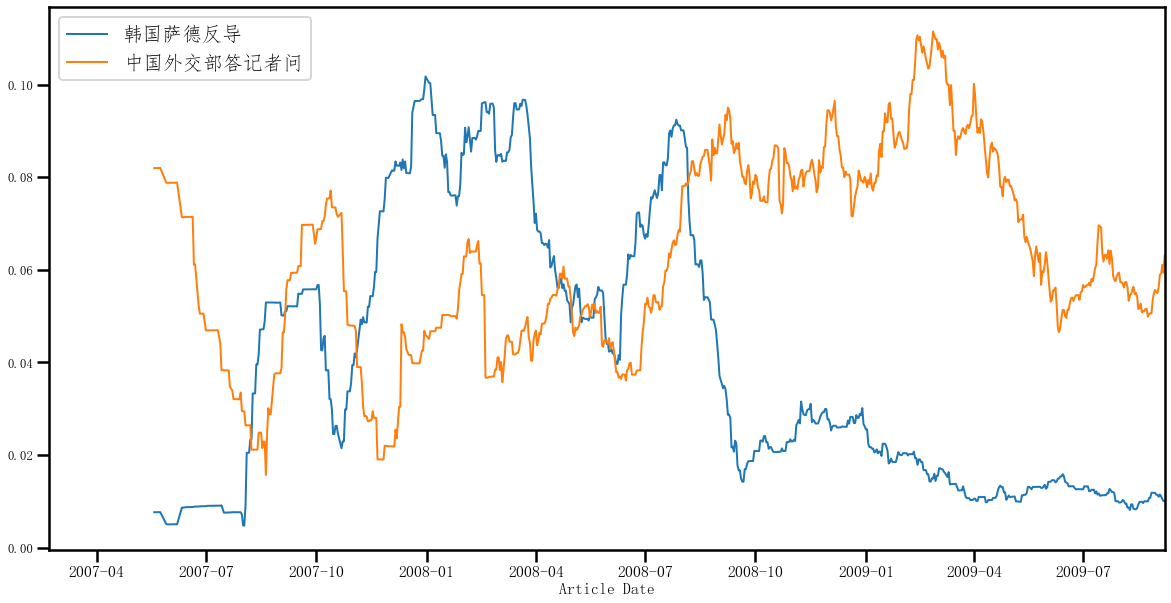

In [77]:
trends.groupby(trends['Article Date'].dt.date).agg(aggs).rolling(window=56).mean().plot()

## 问题
- 如何放大，如何把数据输出转化成前端所需要的数据

In [ ]:
pd.plot()